# Sweden

In [25]:
import pandas as pd
import geopandas as gpd

In [26]:
df = pd.read_excel('data/2019/raw/swe.xls',
                   sheet_name='procent', dtype={'LÄNSKOD': str, 'KOMMUNKOD': str, 'VALDELTAGANDE': str, 'VALDISTRIKTSKOD': str})

In [27]:
df['LÄNSKOD'] = df['LÄNSKOD'].str.zfill(2)
df['KOMMUNKOD'] = df['KOMMUNKOD'].str.zfill(2)
df['VALDISTRIKTSKOD'] = df['VALDISTRIKTSKOD'].str.zfill(4)
df['VD'] = df['LÄNSKOD'] + df['KOMMUNKOD'] + df['VALDISTRIKTSKOD']

Get the shape file for the voting districts for the 2019 European Elections in Sweden



In [28]:
geo = gpd.read_file('data/2019/shapefiles/swe/ep2019_alla_valdistrikt.shp')

Double check that the difference between the number of voting districts in the shape file and the data file is only due to the fact that the data file has a "Uppsamlingsdistrikt" per municipality for votes that are not ascribed to any of the individual voting district.

:warning: NOTE: This means that all the values for turnout per voting district can be an underestimate.

In [30]:
diff = set(df['VD'].unique()) - set(geo['VD'].unique())
assert len(diff) == df[(df['VD'].isin(diff)) & (df['VALDISTRIKTSNAMN'] == 'Uppsamlingsdistrikt')].shape[0]

In [31]:
geo = geo.merge(df[['VD', 'VALDELTAGANDE']], on='VD', how='left')

In [32]:
geo.VALDELTAGANDE = geo.VALDELTAGANDE.str.replace(',', '.').astype(float)

In [33]:
geo = geo[['VD_NAMN', 'VALDELTAGANDE', 'geometry']]
geo.columns = ['name', 'turnout', 'geometry']
geo['country'] = 'swe'

In [34]:
geo = geo.to_crs(epsg=4326)

In [35]:
geo.to_file('data/2019/processed/swe')

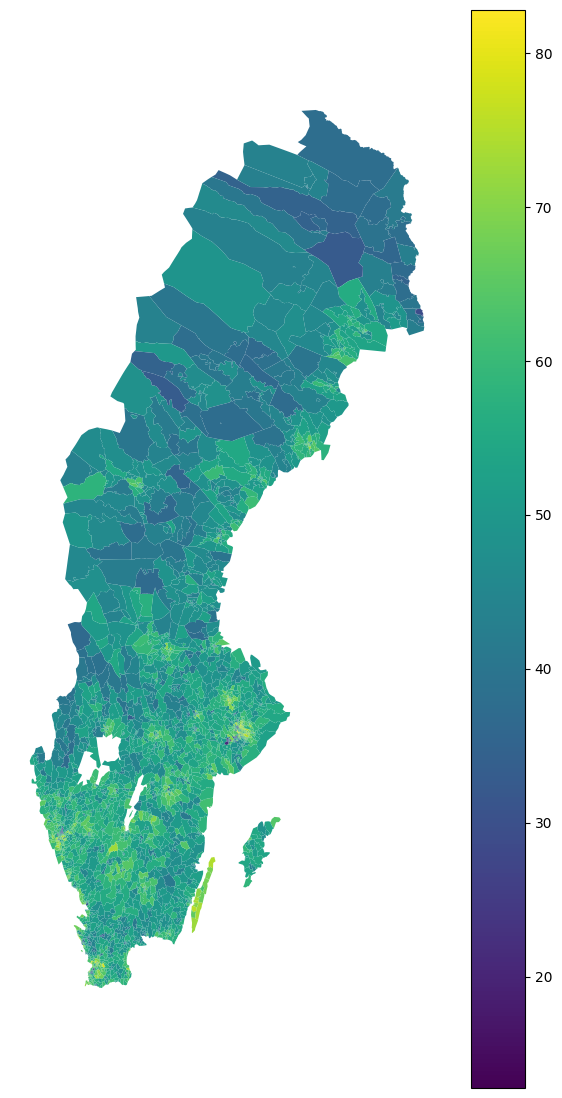

In [36]:
ax = geo.plot(figsize=(7, 14), column='turnout', legend=True);
fig = ax.get_figure()
fig.set_facecolor('#ffffff')
ax.set_axis_off()
fig.savefig('reports/swe_choropleth.png')